## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9740739	total: 58.5ms	remaining: 58.4s
1:	learn: 0.9553554	total: 59.4ms	remaining: 29.6s
2:	learn: 0.9355045	total: 60.6ms	remaining: 20.1s
3:	learn: 0.9180897	total: 61.5ms	remaining: 15.3s
4:	learn: 0.9020027	total: 62.5ms	remaining: 12.4s
5:	learn: 0.8861713	total: 64.1ms	remaining: 10.6s
6:	learn: 0.8693716	total: 65ms	remaining: 9.22s
7:	learn: 0.8532722	total: 66ms	remaining: 8.18s
8:	learn: 0.8383153	total: 66.7ms	remaining: 7.35s
9:	learn: 0.8218375	total: 68.6ms	remaining: 6.79s
10:	learn: 0.8064372	total: 69.5ms	remaining: 6.25s
11:	learn: 0.7910935	total: 70.3ms	remaining: 5.79s
12:	learn: 0.7770628	total: 71.1ms	remaining: 5.4s
13:	learn: 0.7630062	total: 71.8ms	remaining: 5.06s
14:	learn: 0.7517246	total: 72.6ms	remaining: 4.77s
15:	learn: 0.7376375	total: 73.5ms	remaining: 4.52s
16:	learn: 0.7260864	total: 74.3ms	remaining: 4.3s
17:	learn: 0.7139528	total: 75.1ms	remaining: 4.1s
18:	learn: 0.7020391	total: 76ms	remaining: 3.92s
1

52:	learn: 0.4510223	total: 106ms	remaining: 1.89s
53:	learn: 0.4478002	total: 106ms	remaining: 1.86s
54:	learn: 0.4434428	total: 107ms	remaining: 1.84s
55:	learn: 0.4403587	total: 108ms	remaining: 1.82s
56:	learn: 0.4371317	total: 109ms	remaining: 1.8s
57:	learn: 0.4328177	total: 110ms	remaining: 1.78s
58:	learn: 0.4291759	total: 111ms	remaining: 1.76s
59:	learn: 0.4250505	total: 111ms	remaining: 1.74s
60:	learn: 0.4207948	total: 112ms	remaining: 1.73s
61:	learn: 0.4163341	total: 113ms	remaining: 1.71s
62:	learn: 0.4138814	total: 114ms	remaining: 1.69s
63:	learn: 0.4101522	total: 115ms	remaining: 1.67s
64:	learn: 0.4063190	total: 115ms	remaining: 1.66s
65:	learn: 0.4036592	total: 116ms	remaining: 1.64s
66:	learn: 0.3999107	total: 117ms	remaining: 1.63s
67:	learn: 0.3968957	total: 118ms	remaining: 1.62s
68:	learn: 0.3940204	total: 119ms	remaining: 1.6s
69:	learn: 0.3912352	total: 120ms	remaining: 1.59s
70:	learn: 0.3873007	total: 120ms	remaining: 1.58s
71:	learn: 0.3832662	total: 121ms

156:	learn: 0.2563558	total: 192ms	remaining: 1.03s
157:	learn: 0.2553932	total: 193ms	remaining: 1.03s
158:	learn: 0.2547985	total: 194ms	remaining: 1.02s
159:	learn: 0.2541398	total: 195ms	remaining: 1.02s
160:	learn: 0.2531652	total: 196ms	remaining: 1.02s
161:	learn: 0.2524269	total: 197ms	remaining: 1.02s
162:	learn: 0.2518679	total: 197ms	remaining: 1.01s
163:	learn: 0.2512801	total: 198ms	remaining: 1.01s
164:	learn: 0.2503806	total: 199ms	remaining: 1.01s
165:	learn: 0.2492816	total: 200ms	remaining: 1s
166:	learn: 0.2487808	total: 201ms	remaining: 1s
167:	learn: 0.2480656	total: 202ms	remaining: 999ms
168:	learn: 0.2474886	total: 203ms	remaining: 997ms
169:	learn: 0.2467445	total: 204ms	remaining: 994ms
170:	learn: 0.2462594	total: 204ms	remaining: 991ms
171:	learn: 0.2456163	total: 205ms	remaining: 988ms
172:	learn: 0.2450175	total: 206ms	remaining: 986ms
173:	learn: 0.2442778	total: 207ms	remaining: 982ms
174:	learn: 0.2435576	total: 208ms	remaining: 979ms
175:	learn: 0.2431

280:	learn: 0.1936192	total: 296ms	remaining: 757ms
281:	learn: 0.1932827	total: 297ms	remaining: 755ms
282:	learn: 0.1931620	total: 297ms	remaining: 753ms
283:	learn: 0.1925413	total: 298ms	remaining: 752ms
284:	learn: 0.1920201	total: 299ms	remaining: 750ms
285:	learn: 0.1917857	total: 300ms	remaining: 749ms
286:	learn: 0.1916548	total: 301ms	remaining: 747ms
287:	learn: 0.1913295	total: 302ms	remaining: 746ms
288:	learn: 0.1909974	total: 302ms	remaining: 744ms
289:	learn: 0.1904868	total: 304ms	remaining: 743ms
290:	learn: 0.1898317	total: 304ms	remaining: 741ms
291:	learn: 0.1892555	total: 305ms	remaining: 740ms
292:	learn: 0.1885931	total: 306ms	remaining: 738ms
293:	learn: 0.1881353	total: 307ms	remaining: 737ms
294:	learn: 0.1875108	total: 308ms	remaining: 736ms
295:	learn: 0.1870565	total: 309ms	remaining: 734ms
296:	learn: 0.1864095	total: 309ms	remaining: 733ms
297:	learn: 0.1863159	total: 310ms	remaining: 731ms
298:	learn: 0.1858048	total: 311ms	remaining: 730ms
299:	learn: 

384:	learn: 0.1611474	total: 382ms	remaining: 610ms
385:	learn: 0.1606960	total: 383ms	remaining: 609ms
386:	learn: 0.1605767	total: 384ms	remaining: 608ms
387:	learn: 0.1604688	total: 385ms	remaining: 607ms
388:	learn: 0.1601667	total: 385ms	remaining: 605ms
389:	learn: 0.1599293	total: 386ms	remaining: 604ms
390:	learn: 0.1594929	total: 387ms	remaining: 603ms
391:	learn: 0.1592153	total: 388ms	remaining: 602ms
392:	learn: 0.1589662	total: 389ms	remaining: 600ms
393:	learn: 0.1583853	total: 389ms	remaining: 599ms
394:	learn: 0.1579511	total: 390ms	remaining: 598ms
395:	learn: 0.1576026	total: 391ms	remaining: 596ms
396:	learn: 0.1575392	total: 392ms	remaining: 595ms
397:	learn: 0.1571850	total: 393ms	remaining: 594ms
398:	learn: 0.1567957	total: 394ms	remaining: 593ms
399:	learn: 0.1564224	total: 394ms	remaining: 592ms
400:	learn: 0.1560901	total: 395ms	remaining: 590ms
401:	learn: 0.1558741	total: 396ms	remaining: 589ms
402:	learn: 0.1554328	total: 397ms	remaining: 588ms
403:	learn: 

509:	learn: 0.1303373	total: 485ms	remaining: 466ms
510:	learn: 0.1300743	total: 486ms	remaining: 465ms
511:	learn: 0.1299730	total: 487ms	remaining: 464ms
512:	learn: 0.1299506	total: 488ms	remaining: 463ms
513:	learn: 0.1296508	total: 489ms	remaining: 462ms
514:	learn: 0.1296308	total: 490ms	remaining: 461ms
515:	learn: 0.1296089	total: 491ms	remaining: 460ms
516:	learn: 0.1294923	total: 491ms	remaining: 459ms
517:	learn: 0.1292715	total: 492ms	remaining: 458ms
518:	learn: 0.1292152	total: 493ms	remaining: 457ms
519:	learn: 0.1288464	total: 494ms	remaining: 456ms
520:	learn: 0.1285272	total: 494ms	remaining: 455ms
521:	learn: 0.1284718	total: 495ms	remaining: 453ms
522:	learn: 0.1282446	total: 496ms	remaining: 452ms
523:	learn: 0.1280419	total: 497ms	remaining: 451ms
524:	learn: 0.1279736	total: 498ms	remaining: 450ms
525:	learn: 0.1277193	total: 498ms	remaining: 449ms
526:	learn: 0.1274441	total: 499ms	remaining: 448ms
527:	learn: 0.1272455	total: 500ms	remaining: 447ms
528:	learn: 

614:	learn: 0.1113678	total: 572ms	remaining: 358ms
615:	learn: 0.1113107	total: 573ms	remaining: 357ms
616:	learn: 0.1112163	total: 574ms	remaining: 356ms
617:	learn: 0.1109530	total: 575ms	remaining: 355ms
618:	learn: 0.1108933	total: 576ms	remaining: 354ms
619:	learn: 0.1106542	total: 576ms	remaining: 353ms
620:	learn: 0.1104797	total: 577ms	remaining: 352ms
621:	learn: 0.1102527	total: 578ms	remaining: 351ms
622:	learn: 0.1100298	total: 579ms	remaining: 350ms
623:	learn: 0.1098194	total: 580ms	remaining: 349ms
624:	learn: 0.1095586	total: 580ms	remaining: 348ms
625:	learn: 0.1093036	total: 581ms	remaining: 347ms
626:	learn: 0.1090726	total: 582ms	remaining: 346ms
627:	learn: 0.1088581	total: 583ms	remaining: 345ms
628:	learn: 0.1085949	total: 584ms	remaining: 344ms
629:	learn: 0.1083512	total: 584ms	remaining: 343ms
630:	learn: 0.1082595	total: 585ms	remaining: 342ms
631:	learn: 0.1081256	total: 586ms	remaining: 341ms
632:	learn: 0.1078861	total: 587ms	remaining: 340ms
633:	learn: 

738:	learn: 0.0903804	total: 676ms	remaining: 239ms
739:	learn: 0.0901789	total: 677ms	remaining: 238ms
740:	learn: 0.0900207	total: 678ms	remaining: 237ms
741:	learn: 0.0898759	total: 678ms	remaining: 236ms
742:	learn: 0.0896666	total: 679ms	remaining: 235ms
743:	learn: 0.0894725	total: 680ms	remaining: 234ms
744:	learn: 0.0893541	total: 681ms	remaining: 233ms
745:	learn: 0.0892293	total: 682ms	remaining: 232ms
746:	learn: 0.0892001	total: 682ms	remaining: 231ms
747:	learn: 0.0890997	total: 683ms	remaining: 230ms
748:	learn: 0.0890044	total: 684ms	remaining: 229ms
749:	learn: 0.0888278	total: 685ms	remaining: 228ms
750:	learn: 0.0887212	total: 686ms	remaining: 227ms
751:	learn: 0.0885852	total: 687ms	remaining: 226ms
752:	learn: 0.0884766	total: 687ms	remaining: 225ms
753:	learn: 0.0882767	total: 688ms	remaining: 225ms
754:	learn: 0.0880460	total: 689ms	remaining: 224ms
755:	learn: 0.0879389	total: 690ms	remaining: 223ms
756:	learn: 0.0877004	total: 691ms	remaining: 222ms
757:	learn: 

841:	learn: 0.0777287	total: 763ms	remaining: 143ms
842:	learn: 0.0775985	total: 764ms	remaining: 142ms
843:	learn: 0.0774944	total: 765ms	remaining: 141ms
844:	learn: 0.0774475	total: 766ms	remaining: 140ms
845:	learn: 0.0773076	total: 767ms	remaining: 140ms
846:	learn: 0.0771932	total: 768ms	remaining: 139ms
847:	learn: 0.0771810	total: 768ms	remaining: 138ms
848:	learn: 0.0770172	total: 769ms	remaining: 137ms
849:	learn: 0.0768737	total: 770ms	remaining: 136ms
850:	learn: 0.0768665	total: 771ms	remaining: 135ms
851:	learn: 0.0767860	total: 772ms	remaining: 134ms
852:	learn: 0.0766923	total: 772ms	remaining: 133ms
853:	learn: 0.0765590	total: 773ms	remaining: 132ms
854:	learn: 0.0764152	total: 774ms	remaining: 131ms
855:	learn: 0.0762322	total: 775ms	remaining: 130ms
856:	learn: 0.0761343	total: 776ms	remaining: 129ms
857:	learn: 0.0760057	total: 777ms	remaining: 129ms
858:	learn: 0.0758771	total: 778ms	remaining: 128ms
859:	learn: 0.0757073	total: 778ms	remaining: 127ms
860:	learn: 

962:	learn: 0.0648107	total: 867ms	remaining: 33.3ms
963:	learn: 0.0646946	total: 868ms	remaining: 32.4ms
964:	learn: 0.0646246	total: 868ms	remaining: 31.5ms
965:	learn: 0.0645099	total: 869ms	remaining: 30.6ms
966:	learn: 0.0644114	total: 870ms	remaining: 29.7ms
967:	learn: 0.0643370	total: 871ms	remaining: 28.8ms
968:	learn: 0.0642611	total: 872ms	remaining: 27.9ms
969:	learn: 0.0642037	total: 873ms	remaining: 27ms
970:	learn: 0.0641161	total: 873ms	remaining: 26.1ms
971:	learn: 0.0640086	total: 874ms	remaining: 25.2ms
972:	learn: 0.0639402	total: 875ms	remaining: 24.3ms
973:	learn: 0.0638592	total: 876ms	remaining: 23.4ms
974:	learn: 0.0637430	total: 877ms	remaining: 22.5ms
975:	learn: 0.0636679	total: 878ms	remaining: 21.6ms
976:	learn: 0.0635875	total: 878ms	remaining: 20.7ms
977:	learn: 0.0634897	total: 879ms	remaining: 19.8ms
978:	learn: 0.0634172	total: 880ms	remaining: 18.9ms
979:	learn: 0.0633359	total: 881ms	remaining: 18ms
980:	learn: 0.0632632	total: 882ms	remaining: 17.1

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

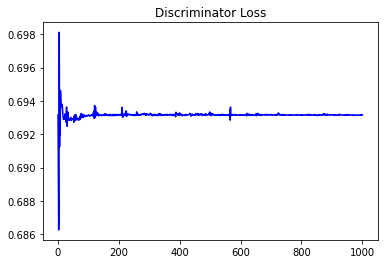

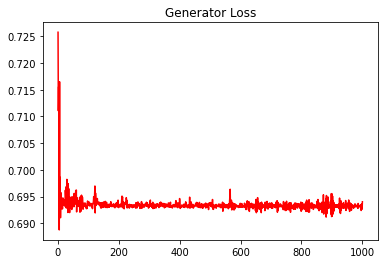

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11604576428800029


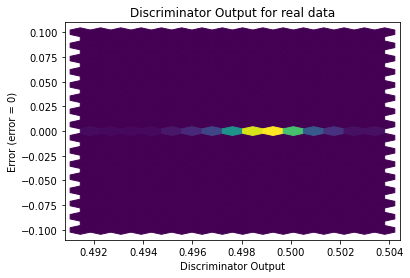

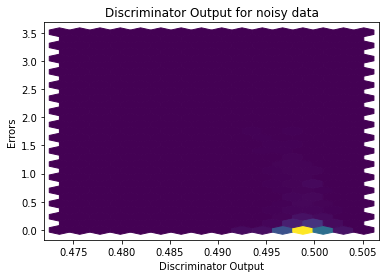

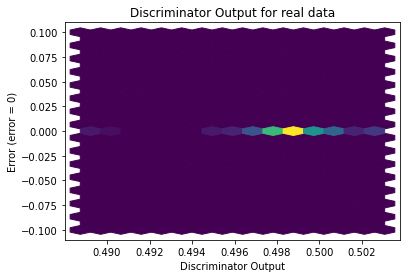

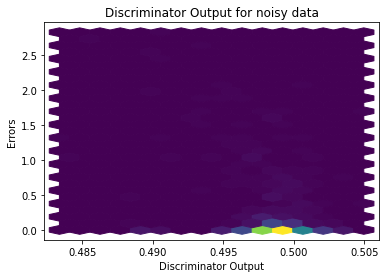

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


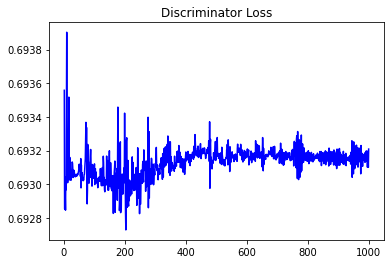

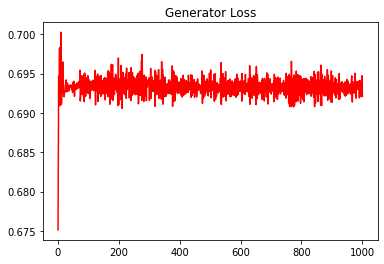

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1076811764293916


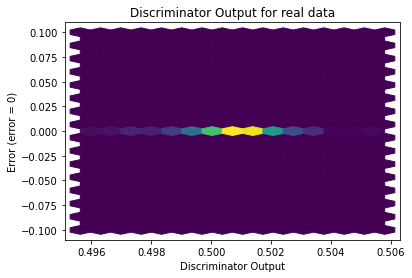

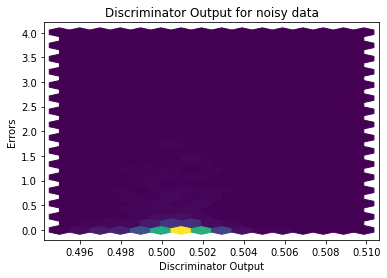

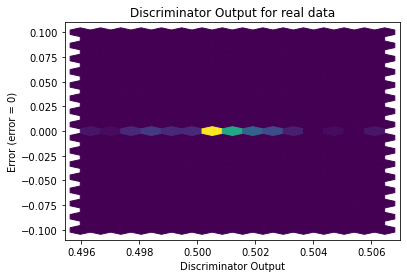

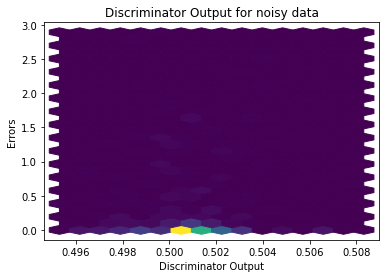

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0687]], requires_grad=True)
